# Tugas K-Means Data Mining

### Nama : Joy Sitorus Pane (2111016210019)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# K-Means Data Mining dengan K=2

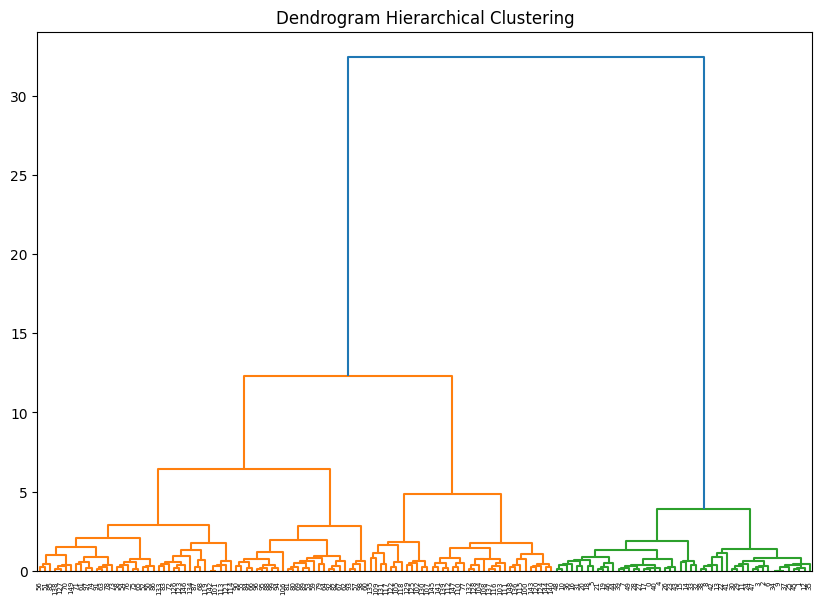

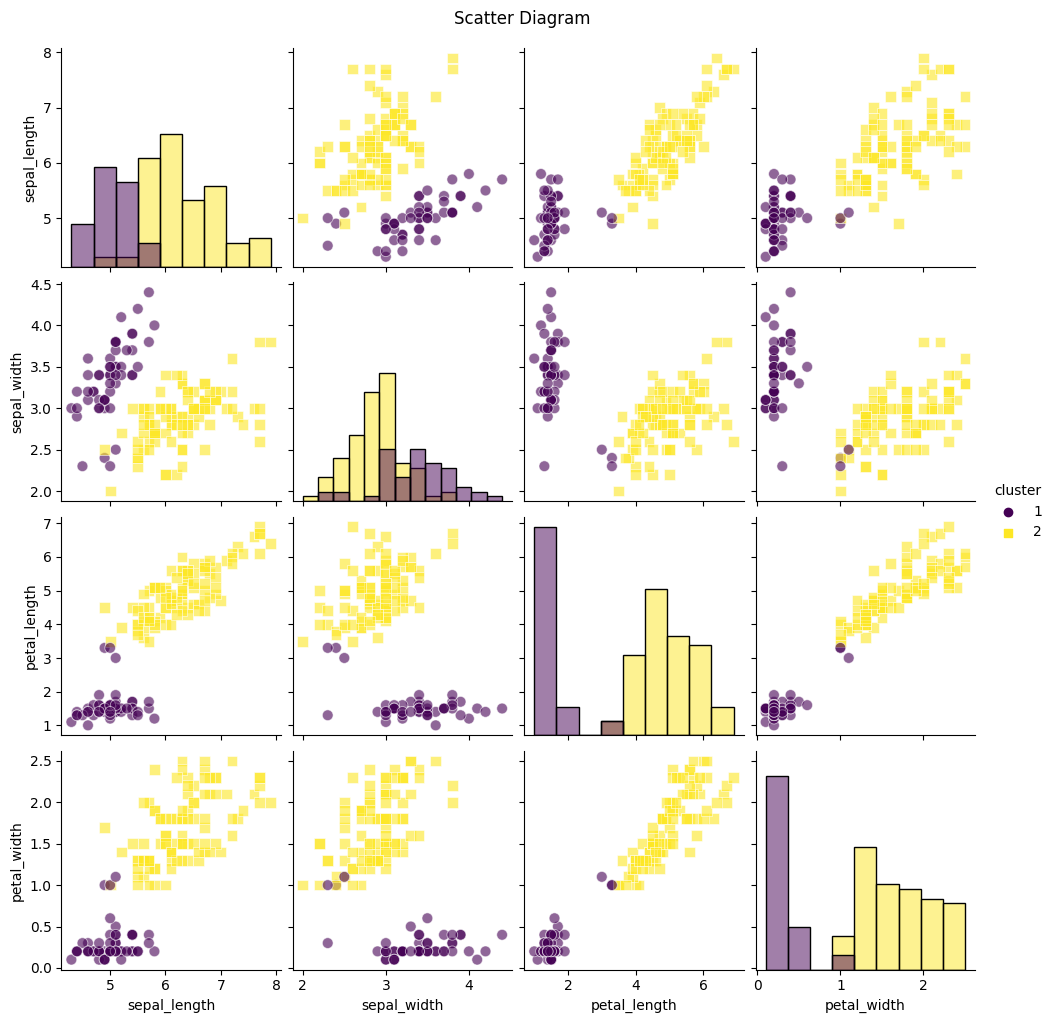


Silhouette Score: 0.6808136202936816


In [12]:
import csv
import pandas as pd
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Baca dataset dan buang kolom terakhir (nama spesies)
with open("/content/drive/MyDrive/Colab Notebooks/Data Mining/iris.data", 'r') as csvfile:
    lines = csv.reader(csvfile)
    dataset = [row[:-1] for row in lines]

# Konversi string ke float
for x in range(len(dataset)):
    for y in range(4):
        dataset[x][y] = float(dataset[x][y])

# Membuat DataFrame dari dataset
df = pd.DataFrame(dataset, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Inisialisasi centroid awal
initial_centroids = np.array([[4.9, 3.1, 1.5, 0.1], [5.7, 2.8, 4.1, 1.3]])

# K-means clustering dengan k=2 dan centroid awal yang telah ditentukan
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
kmeans.fit(df)

# Menambahkan kolom hasil clustering ke DataFrame dan mengubah nilai 0 dan 1 menjadi 1 dan 2
df['cluster'] = kmeans.labels_ + 1

# Tampilkan tabel interaktif dengan 150 baris data
trace = go.Table(
    header=dict(values=['Data ke-', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster'],
                fill=dict(color='#C2D4FF'),
                align='left'),
    cells=dict(values=[[i+1 for i in range(len(df))], df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width'], df['cluster']],
               fill=dict(color='#F5F8FF'),
               align='left'))

data = [trace]
layout = go.Layout(title='Hasil Clustering dengan K=2 dan Centroid Awal [4.9, 3.1, 1.5, 0.1], [5.7, 2.8, 4.1, 1.3]')
fig = go.Figure(data=data, layout=layout)
fig.update_layout(height=800)  # Atur tinggi tabel
fig.show()

# Hierarchical clustering
linked = linkage(df.drop('cluster', axis=1), 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Hierarchical Clustering')
plt.show()

print("")
# Tampilkan scatter plot untuk hasil clustering KMeans dengan K=2 untuk keempat atribut sekaligus
sns.pairplot(df, hue='cluster', palette='viridis', diag_kind='hist', markers=["o", "s"], plot_kws={'alpha':0.6, 's': 60})
plt.suptitle('Scatter Diagram', y=1.02)
plt.show()

print("")
# Hitung nilai silhouette untuk KMeans
silhouette_avg = silhouette_score(df.drop('cluster', axis=1), df['cluster'])
print("Silhouette Score:", silhouette_avg)


# K-Means Data Mining dengan K=3

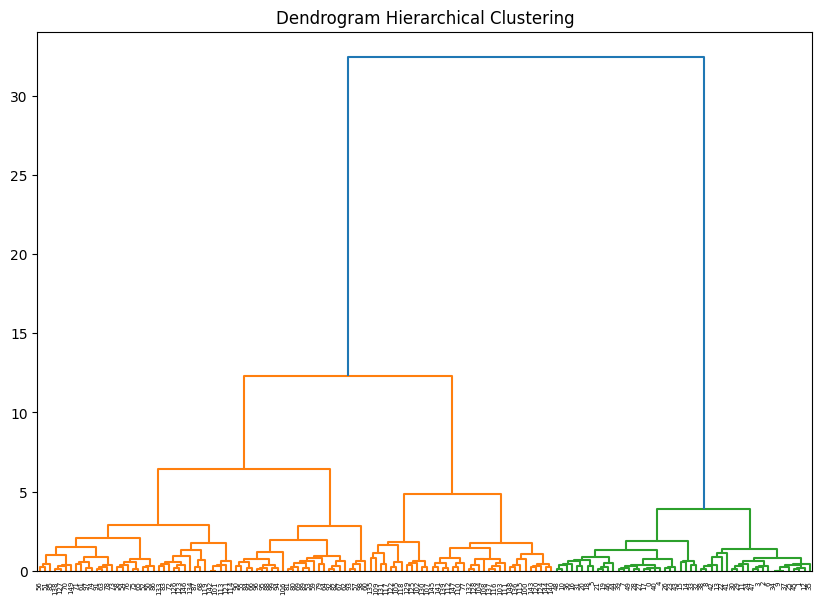

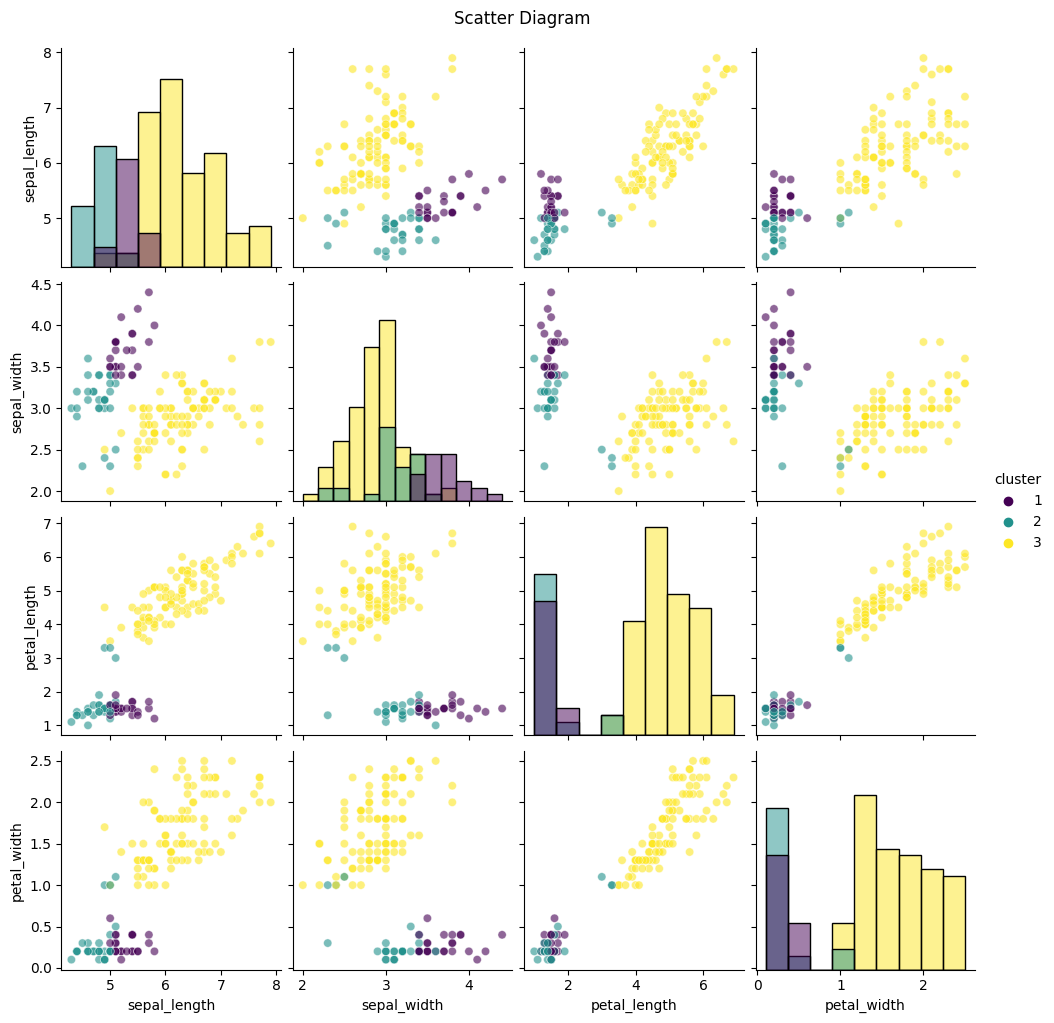


Silhouette Score: 0.5169605202239883


In [11]:
import csv
import pandas as pd
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Baca dataset dan buang kolom terakhir (nama spesies)
with open("/content/drive/MyDrive/Colab Notebooks/Data Mining/iris.data", 'r') as csvfile:
    lines = csv.reader(csvfile)
    dataset = [row[:-1] for row in lines]

# Konversi string ke float
for x in range(len(dataset)):
    for y in range(4):
        dataset[x][y] = float(dataset[x][y])

# Membuat DataFrame dari dataset
df = pd.DataFrame(dataset, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Inisialisasi centroid awal
initial_centroids = np.array([
    [5, 3.6, 1.4, 0.2],
    [5, 3.3, 1.4, 0.2],
    [5.7, 2.8, 4.1, 1.3]
])


# K-means clustering dengan k=2 dan centroid awal yang telah ditentukan
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1)
kmeans.fit(df)

# Menambahkan kolom hasil clustering ke DataFrame dan mengubah nilai 0 dan 1 menjadi 1 dan 2
df['cluster'] = kmeans.labels_ + 1

# Tampilkan tabel interaktif dengan 150 baris data
trace = go.Table(
    header=dict(values=['Data ke-', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster'],
                fill=dict(color='#C2D4FF'),
                align='left'),
    cells=dict(values=[[i+1 for i in range(len(df))], df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width'], df['cluster']],
               fill=dict(color='#F5F8FF'),
               align='left'))

data = [trace]
layout = go.Layout(title='Hasil Clustering dengan K=3 dan Centroid Awal [5, 3.6, 1.4, 0.2], [5, 3.3, 1.4, 0.2], [5.7, 2.8, 4.1, 1.3]')
fig = go.Figure(data=data, layout=layout)
fig.update_layout(height=800)  # Atur tinggi tabel
fig.show()

# Hierarchical clustering
linked = linkage(df.drop('cluster', axis=1), 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Hierarchical Clustering')
plt.show()

print("")
# Tampilkan scatter plot untuk hasil clustering KMeans dengan K=2 untuk keempat atribut sekaligus
sns.pairplot(df, hue='cluster', palette='viridis', diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Scatter Diagram', y=1.02)
plt.show()

print("")
# Hitung nilai silhouette untuk KMeans
silhouette_avg = silhouette_score(df.drop('cluster', axis=1), df['cluster'])
print("Silhouette Score:", silhouette_avg)
